In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import HTC
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.colors as colors
from cycler import cycler
import copy

In [2]:
with open('norm_100run_6000time_0-0to0-3_compute_all_2.pickle', 'rb') as handle:
    orig = pickle.load(handle)
W66=np.loadtxt("../Data/connectivity_matrix/weights.txt")


In [3]:
o1=pickle.load(open('weight_100run_6000time_0-1to0-16tc_20_50.bin','rb'))
o1_at=pickle.load(open('weight_100run_6000time_0-1to0-16tc_20_50_attempts.bin','rb'))
o1_w=pickle.load(open('weight_100run_6000time_0-1to0-16tc_20_50_w_new.bin','rb'))
o2=pickle.load(open('weight_100run_6000time_0-1to0-16tc_100_200.bin','rb'))
o2_at=pickle.load(open('weight_100run_6000time_0-1to0-16tc_100_200_attempts.bin','rb'))
o2_w=pickle.load(open('weight_100run_6000time_0-1to0-16tc_100_200_w_new.bin','rb'))
o3=pickle.load(open('weight_100run_6000time_0-1to0-16tc_150_250.bin','rb'))
o3_at=pickle.load(open('weight_100run_6000time_0-1to0-16tc_150_250_attempts.bin','rb'))
o3_w=pickle.load(open('weight_100run_6000time_0-1to0-16tc_150_250_w_new.bin','rb'))

In [4]:
print('o1',o1_at,'\no2',o2_at,'\no3',o3_at)#,'\no4',o4_at,'\no5',o5_at)

o1 {20: 50, 50: 50} 
o2 {100: 50, 200: 50} 
o3 {150: 50, 250: 50}


In [5]:
o=[o1[0],o1[1],o2[0],o3[0],o2[1],o3[1]]
o_a=[20,50,100,150,200,250]
o_w=[o1_w[0],o1_w[1],o2_w[0],o3_w[0],o2_w[1],o3_w[1]]

In [6]:
len(o_w), o_w[-1].shape

(6, (50, 66, 66))

In [7]:
tc_index={0.1:0,0.11:1,0.12:2,0.13:3,0.14:4,0.15:5}
#tc_index={v*0.01:v for v in range(31)}
tc_orig_index={v*0.01:v for v in range(31)}

o_a_index={v:i for i,v in enumerate(o_a)}

In [8]:
rho_orig,chi_orig=HTC.rho_chi_added_weights([orig])

/mnt/c/Users/berto/NotSync/GitHub/TesiTriennale/Code/Utilities.py:211: RuntimeWarning: invalid value encountered in true_divide
  chi[w, i] = np.sqrt(np.nansum((h_fmri-h_norm)**2/(h_fmri+h_norm)))


In [9]:
rho_f=np.zeros((len(o),len(o[0]),len(o[0][0]['tc'])))
chi_f=np.zeros((len(o),len(o[0]),len(o[0][0]['tc'])))

for i in range(len(o)):
    rho_f[i],chi_f[i] = HTC.rho_chi_added_weights( o[i], 'set')


In [10]:
rho_f.shape, len(o_a)

((6, 50, 6), 6)

# Grafici
Nei prossimi 2 istogrammi si mostrano gli andamenti di rho e di chi^2 per una specifica tc in funzione del numero di link aggiunti.
la tc è stata scelta nell'intervallo fra 0.1 e 0.15 in cui si è visto nelle precedenti analisi verificarsi la migliore correlazione con i dati sperimentali.

Si verifica che per una tc di 0.1/0.11 in corrispondenza di 50/100 nodi aggiunti si ha una correlazione pressochè invariata, ma un netto miglioramento della distanza del chi^2.
Questo fatto lascia supporre che l'aggiunta di circa 50/100 link, pari ad una umento di circa il 50% rispetto ai 193 link già esistenti interemisferici, porti il modello ad correlare meglio con i dati sperimentali.

Le due metriche seppur confrontando i risultati della simulazione con quelli sperimentali mirano ad analizzare diversi aspetti: la correlazione si focalizza sul confronto fra singoli $r_ij$ sperimentali e simulati, mentre il chi^2 sulla loro distribuzione generale. 

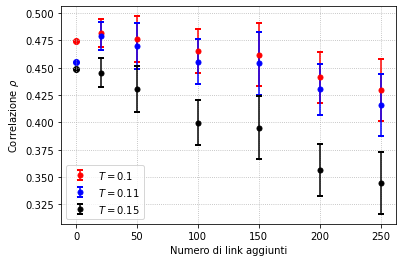

In [11]:
custom_cycler = (cycler(color=['r', 'b', 'k']))
fig,ax1=plt.subplots()

ax1.set_prop_cycle(custom_cycler)

tc_compute=[0.1,0.11,0.15]
for i,tc in enumerate(tc_compute):
    ax1.errorbar(o_a, np.mean(rho_f[:,:,tc_index[tc]], axis=1), yerr=np.std(rho_f[:,:,tc_index[0.1]], axis=1), 
             fmt='o', label=r'$T=$'+str(tc), capsize=3, capthick=2, markersize=5)
    ax1.scatter(0,rho_orig[0,tc_orig_index[tc]])#, label='Normalizzato Tc='+str(tc),)

ax1.set_ylabel(r'Correlazione $\rho$')
ax1.set_xlabel('Numero di link aggiunti')
plt.legend()
plt.grid(True, ls='dotted')
plt.savefig('../Figure/Risultati/rho_add_link.pdf',bbox_inches='tight')
plt.show()

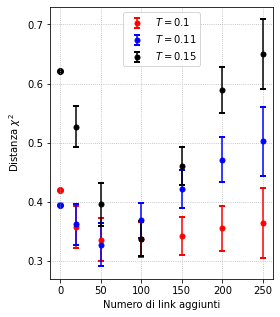

In [30]:
custom_cycler = (cycler(color=['r', 'b', 'k']))
fig,ax1=plt.subplots(figsize=(4,5))

ax1.set_prop_cycle(custom_cycler)

tc_compute=[0.1,0.11,0.15]
for i,tc in enumerate(tc_compute):
    ax1.errorbar(o_a,np.mean(chi_f[:,:,tc_index[tc]], axis=1), yerr=np.std(chi_f[:,:,tc_index[0.1]], axis=1), 
             fmt='o', label=r'$T=$'+str(tc), capsize=3, capthick=2, markersize=5)
    ax1.scatter(0,chi_orig[0,tc_orig_index[tc]])#, label='Normalizzato Tc='+str(tc),)
ax1.set_ylabel(r'Distanza $\chi^2$')
ax1.set_xlabel('Numero di link aggiunti')
plt.legend(loc='upper center')
plt.grid(True, ls='dotted')
#plt.savefig('../Figure/Risultati/chi_add_link.pdf',bbox_inches='tight')

plt.show()

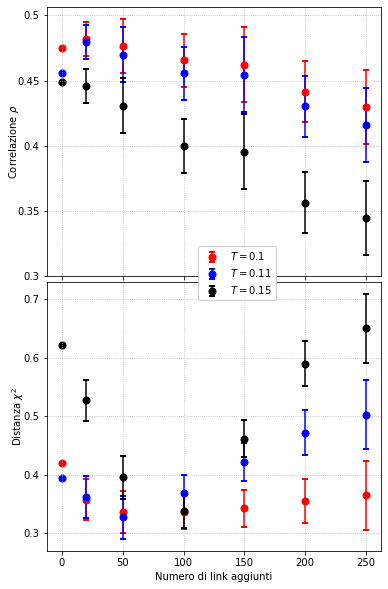

In [143]:
fig,ax = plt.subplots(ncols=1, nrows=2,figsize=(6,10), sharex=True)

for a in ax:
    #a.set_xticklabels([])
    #a.set_yticklabels([])
    #a.set_aspect('equal')
    a.grid(True, ls='dotted')
    
ax0,ax1=ax



custom_cycler = (cycler(color=['r', 'b', 'k']))

ax0.set_prop_cycle(custom_cycler)

tc_compute=[0.1,0.11,0.15]
for i,tc in enumerate(tc_compute):
    ax0.errorbar(o_a, np.mean(rho_f[:,:,tc_index[tc]], axis=1), yerr=np.std(rho_f[:,:,tc_index[0.1]], axis=1), 
             fmt='o', label=r'$T=$'+str(tc), capsize=3, capthick=2, markersize=7)
    ax0.scatter(0,rho_orig[0,tc_orig_index[tc]],s=50)#, label='Normalizzato Tc='+str(tc),)

ax0.set_ylabel(r'Correlazione $\rho$', labelpad=-4)
#ax0.set_xlabel('Numero di link aggiunti')
plt.grid(True, ls='dotted')
ax0.set_yticks([0.3,0.35,0.4,0.45,0.5])
ax0.set_yticklabels([0.3,0.35,0.4,0.45,0.5])

ax1.set_prop_cycle(custom_cycler)

tc_compute=[0.1,0.11,0.15]
for i,tc in enumerate(tc_compute):
    ax1.errorbar(o_a,np.mean(chi_f[:,:,tc_index[tc]], axis=1), yerr=np.std(chi_f[:,:,tc_index[0.1]], axis=1), 
             fmt='o', label=r'$T=$'+str(tc), capsize=3, capthick=2, markersize=7)
    ax1.scatter(0,chi_orig[0,tc_orig_index[tc]],s=50)#, label='Normalizzato Tc='+str(tc),)
ax1.set_ylabel(r'Distanza $\chi^2$',labelpad=-2)
ax1.set_xlabel('Numero di link aggiunti')
#ax1.legend(loc='upper center')
ax1.grid(True, ls='dotted')

ax1.legend(bbox_to_anchor=(0.7, 1.15), framealpha=1)

fig.subplots_adjust(wspace=0.3, hspace=0.02)
plt.savefig('../FigurePowerPoint/chi_rho_aggiunti.svg', bbox_inches='tight', dpi=200)
plt.show()

# Istogrammi
Sapendo che l'aggiunta dello stesso numero di link casuali, come mostrato dalle barre d'errore dei grafici precedenti, non genera simulazioni con la stessa correlazione ai dati sperimentali. si è scelto di approfondire quali sono i connettomi che generano correlazioni migliori.

Si è deciso di analizzare i connettomi per tc=0.11 per l'aggiunta di 20,50,100 e 200 link istogrammando le frequenze con cui i connettomi generavano le specifiche correlazioni o distanze chi^2.
È immediato verificare che le distribuzioni dei valori di rho e chi^2 seguono un andamento gaussiano con una soglia superiore per la rho a 0.52 e inferiore per il chi a 0.25.
Da questa analisi è stato quindi possibile recuperare quali fossero i connettomi usati per le simulazioni che hanno generato correlazioni più alte o distanze chi^2 piu basse al fine di identificare possibili pattern che a parità di link aggiunti modifichino sostanzialmente l'accuratezza con il dato sperimentale.

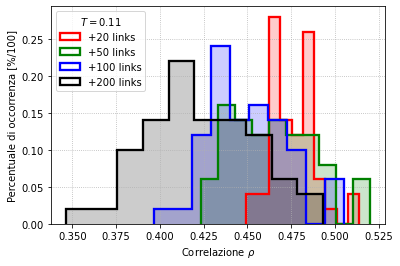

In [99]:
tc_compute_hist=0.11
custom_cycler = (cycler(color=['r', 'g', 'blue','k']))

fig,ax1=plt.subplots()
ax1.set_prop_cycle(custom_cycler)
for i_links,links in enumerate([20,50,100,200]):
    hist, bins = np.histogram(rho_f[o_a_index[links],:,tc_index[tc_compute_hist]])
    ax1.hist(bins[:-1], bins, weights=hist/hist.sum(),
             #label='+'+str(links)+' links',
             align='left', histtype='stepfilled',
             alpha=0.2)
for i_links,links in enumerate([20,50,100,200]):
    hist, bins = np.histogram(rho_f[o_a_index[links],:,tc_index[tc_compute_hist]])
    ax1.hist(bins[:-1], bins, weights=hist/hist.sum(),
             label='+'+str(links)+' links',
             align='left', histtype='step',
            linewidth=2.3,alpha=1)

plt.grid(True, ls='dotted')
plt.ylabel('Percentuale di occorrenza [%/100]')
plt.legend(title=r'$T=$'+str(tc_compute_hist))
plt.xlabel(r'Correlazione $\rho$')
#plt.text(0.4,0.2,r'$T_c=$'+str(tc_compute_hist), fontsize=14)
plt.savefig('../Figure/Risultati/dist_rho_link.pdf',bbox_inches='tight')
plt.show()

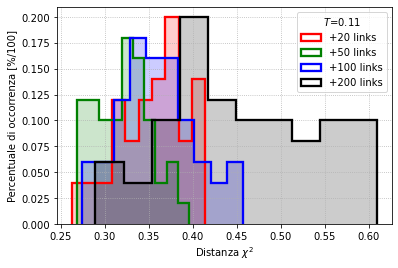

In [98]:
tc_compute_hist=0.11

fig,ax1=plt.subplots()
ax1.set_prop_cycle(custom_cycler)

for i_links,links in enumerate([20,50,100,200]):
    hist, bins = np.histogram(chi_f[o_a_index[links],:,tc_index[tc_compute_hist]])
    ax1.hist(bins[:-1], bins, weights=hist/hist.sum(),
             #label='+'+str(links)+' links',
             align='left', histtype='stepfilled',
            linewidth=2,alpha=0.2)
for i_links,links in enumerate([20,50,100,200]):
    hist, bins = np.histogram(chi_f[o_a_index[links],:,tc_index[tc_compute_hist]])
    ax1.hist(bins[:-1], bins, weights=hist/hist.sum(),
             label='+'+str(links)+' links',
             align='left', histtype='step',
            linewidth=2.3)


plt.grid(True, ls='dotted')
plt.ylabel('Percentuale di occorrenza [%/100]')
plt.legend(title=r'$T$='+str(tc_compute_hist))
plt.xlabel(r'Distanza $\chi^2$')
#plt.text(0.4,0.2,r'$T_c=$'+str(tc_compute_hist), fontsize=14)
plt.savefig('../Figure/Risultati/dist_chi_link.pdf',bbox_inches='tight')

plt.show()

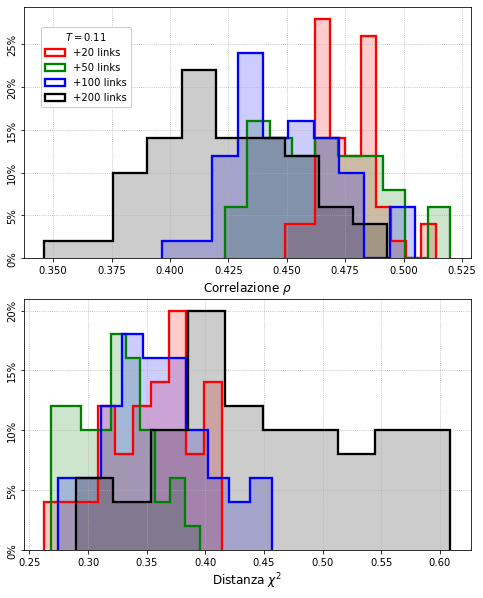

In [200]:
fig,ax = plt.subplots(ncols=1, nrows=2,figsize=(8,10))

for a in ax:
    #a.set_xticklabels([])
    #a.set_yticklabels([])
    #a.set_aspect('equal')
    a.grid(True, ls='dotted')
    
ax0,ax1=ax



tc_compute_hist=0.11
custom_cycler = (cycler(color=['r', 'g', 'blue','k']))

ax0.set_prop_cycle(custom_cycler)
for i_links,links in enumerate([20,50,100,200]):
    hist, bins = np.histogram(rho_f[o_a_index[links],:,tc_index[tc_compute_hist]])
    ax0.hist(bins[:-1], bins, weights=hist/hist.sum()*100,
             #label='+'+str(links)+' links',
             align='left', histtype='stepfilled',
             alpha=0.2)
for i_links,links in enumerate([20,50,100,200]):
    hist, bins = np.histogram(rho_f[o_a_index[links],:,tc_index[tc_compute_hist]])
    ax0.hist(bins[:-1], bins, weights=hist/hist.sum()*100,
             label='+'+str(links)+' links',
             align='left', histtype='step',
            linewidth=2.3,alpha=1)

ax0.grid(True, ls='dotted')
#ax0.set_ylabel('Percentuale di occorrenza [%]')
ax0.set_xlabel(r'Correlazione $\rho$', size=12)


tc_compute_hist=0.11

ax1.set_prop_cycle(custom_cycler)

for i_links,links in enumerate([20,50,100,200]):
    hist, bins = np.histogram(chi_f[o_a_index[links],:,tc_index[tc_compute_hist]])
    ax1.hist(bins[:-1], bins, weights=hist/hist.sum()*100,
             #label='+'+str(links)+' links',
             align='left', histtype='stepfilled',
            linewidth=2,alpha=0.2)
for i_links,links in enumerate([20,50,100,200]):
    hist, bins = np.histogram(chi_f[o_a_index[links],:,tc_index[tc_compute_hist]])
    ax1.hist(bins[:-1], bins, weights=hist/hist.sum()*100,
             label='+'+str(links)+' links',
             align='left', histtype='step',
            linewidth=2.3)


ax1.grid(True, ls='dotted')
#ax1.set_ylabel('Percentuale di occorrenza [%]')
#ax1.legend(title=r'$T$='+str(tc_compute_hist))
ax1.set_xlabel(r'Distanza $\chi^2$', size=12)

ax1.legend(title=r'$T=$'+str(tc_compute_hist), framealpha=1, bbox_to_anchor=(0.25, 2.1))
#ax0.set_yticklabels(['0%','5%','10%','15%','20%','25%'], rotation=90)
#ax1.set_yticklabels(['0%','5%','10%','15%','20%','25%'], rotation=90)

ax0.set_yticks([0,5,10,15,20,25])
ax0.set_yticklabels(['0%','5%','10%','15%','20%','25%'], rotation=90, va='center')

ax1.set_yticks([0,5,10,15,20])
ax1.set_yticklabels(['0%','5%','10%','15%','20%'], rotation=90, va='center')

#ax1.yaxis.set_label_position("right")
#ax1.yaxis.tick_right()


fig.subplots_adjust(hspace=0.16)
plt.savefig('../FigurePowerPoint/chi_rho_aggiunti_hist.svg', bbox_inches='tight', dpi=200)
plt.show()

In [15]:
#trovare indici di connettoma migliore e peggiore per chi
n_link=200
t_c=0.15
def find_min_max(n_link, t_c):
    list_chi=chi_f[o_a_index[n_link],:,tc_index[t_c]]
    list_rho=rho_f[o_a_index[n_link],:,tc_index[t_c]]

    index_min_chi=np.where(list_chi==np.min(list_chi))[0][0]
    index_max_chi=np.where(list_chi==np.max(list_chi))[0][0]

    index_min_rho=np.where(list_rho==np.min(list_rho))[0][0]
    index_max_rho=np.where(list_rho==np.max(list_rho))[0][0]

    return {'worst':{'chi':index_max_chi,'rho': index_min_rho},
            'best':{'chi':index_min_chi, 'rho':index_max_rho}},{'tc':t_c,'nlink':n_link}

results=[find_min_max(n_link, t_c) for n_link in o_a for t_c in tc_index.keys()]

In [16]:
results

[({'worst': {'chi': 34, 'rho': 35}, 'best': {'chi': 31, 'rho': 0}},
  {'tc': 0.1, 'nlink': 20}),
 ({'worst': {'chi': 49, 'rho': 35}, 'best': {'chi': 35, 'rho': 0}},
  {'tc': 0.11, 'nlink': 20}),
 ({'worst': {'chi': 27, 'rho': 40}, 'best': {'chi': 17, 'rho': 38}},
  {'tc': 0.12, 'nlink': 20}),
 ({'worst': {'chi': 3, 'rho': 32}, 'best': {'chi': 17, 'rho': 2}},
  {'tc': 0.13, 'nlink': 20}),
 ({'worst': {'chi': 49, 'rho': 32}, 'best': {'chi': 6, 'rho': 2}},
  {'tc': 0.14, 'nlink': 20}),
 ({'worst': {'chi': 3, 'rho': 32}, 'best': {'chi': 12, 'rho': 38}},
  {'tc': 0.15, 'nlink': 20}),
 ({'worst': {'chi': 48, 'rho': 25}, 'best': {'chi': 12, 'rho': 28}},
  {'tc': 0.1, 'nlink': 50}),
 ({'worst': {'chi': 40, 'rho': 24}, 'best': {'chi': 31, 'rho': 48}},
  {'tc': 0.11, 'nlink': 50}),
 ({'worst': {'chi': 40, 'rho': 31}, 'best': {'chi': 9, 'rho': 47}},
  {'tc': 0.12, 'nlink': 50}),
 ({'worst': {'chi': 25, 'rho': 12}, 'best': {'chi': 12, 'rho': 22}},
  {'tc': 0.13, 'nlink': 50}),
 ({'worst': {'chi': 

In [17]:
for res in results:
    if res[0]['worst']['chi']==res[0]['worst']['rho'] or res[0]['best']['chi']==res[0]['best']['rho']:
        print(res)

({'worst': {'chi': 19, 'rho': 19}, 'best': {'chi': 25, 'rho': 27}}, {'tc': 0.13, 'nlink': 200})


# Analisi visiva connettoma
Si sono quindi analizzati visivamente i connettomi che hanno generato le configurazioni con migliore e peggiore accuratezza, distinguendo in particolare la posizione in cui sono state aggiunte nuove connessioni.

Non è stato possibile ricavare un unico risultato in quanto la statistica a disposizione è ancora limitata. Per una analisi più dettagliata sarebbe necessario disporre di due connettomi in cui il primo sia singolarmente il rappresentativo dei migliori per le metriche di rho e di chi^2 contemporaneamente ed il secondo sia il peggiore rappresentativo per le metriche di rho e chi affinchè sia più agevole rintracciare eventuali pattern nella disposizione dei nuovi link.

Nei connettomi analizzati si è verificato solo un caso in cui un connettoma è risultato il worst-performing per la categoria di 200 lik aggiunti a tc=0.13 sotto le metriche di rho e chi^2, di cui si riporta l'analisi grafica in fondo alla pagina.

Per analizzare al meglio l'influenza della disposizione dei link sull'accuratezza è necessaria un'analisi più approfondita in cui si sviluppi un metodo che oltre a controllare il numero di link aggiunti analizzi anche la loro disposizione nelle connessioni vuote. Osservando le FC sperimentali si ipotizza che un maggior numero di link tra regioni con analoga funzionalità di emisferi opposti innalzino l'accuratezza dl modello.

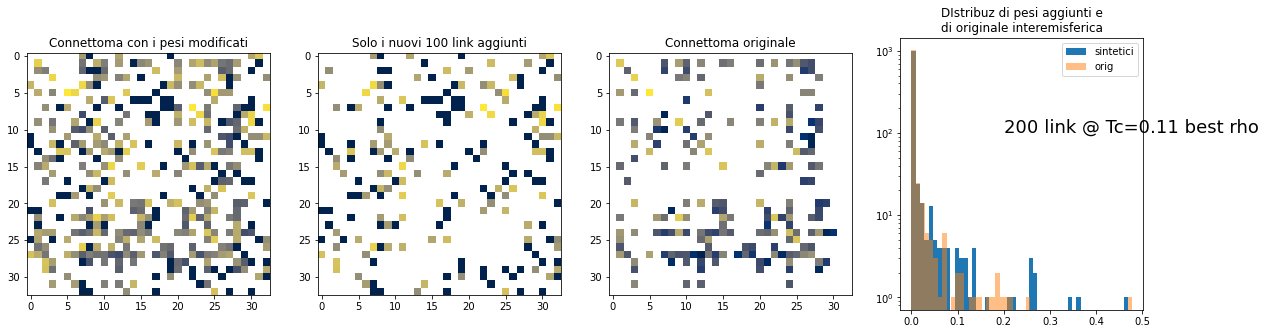

In [18]:
t_c_analizzata=0.11
n_link_aggiunti=200
res1,_=find_min_max(t_c=t_c_analizzata, n_link=n_link_aggiunti)

best_conn_max_rho=o_w[o_a_index[n_link_aggiunti]][res1['best']['rho']]

only_added_links=copy.deepcopy(best_conn_max_rho)
for i in range(66):
    for j in range(66):
        if W66[i,j]!=0:
            only_added_links[i,j]=0

fig,ax=plt.subplots(ncols=4, figsize=(20,5))
ax[0].imshow(best_conn_max_rho[0:33,33:],norm=colors.LogNorm(), cmap='cividis')
ax[0].set_title('Connettoma con i pesi modificati')
#plt.show()

ax[1].imshow(only_added_links[0:33,33:],norm=colors.LogNorm(), cmap='cividis')
ax[1].set_title('Solo i nuovi 100 link aggiunti')
#plt.show()

ax[2].imshow(W66[0:33,33:],norm=colors.LogNorm(), cmap='cividis')
ax[2].set_title('Connettoma originale')
#plt.show()

ax[3].hist(only_added_links[0:33,33:].flatten(), bins=50, log=True, label='sintetici')
ax[3].hist(W66[0:33,33:].flatten(), bins=50, log=True, alpha=0.5, label='orig')
ax[3].legend()
ax[3].text(0.2,100, str(n_link_aggiunti)+' link @ Tc='+str(t_c_analizzata)+' best rho', fontsize=18)
ax[3].set_title('DIstribuz di pesi aggiunti e\ndi originale interemisferica')
plt.show()

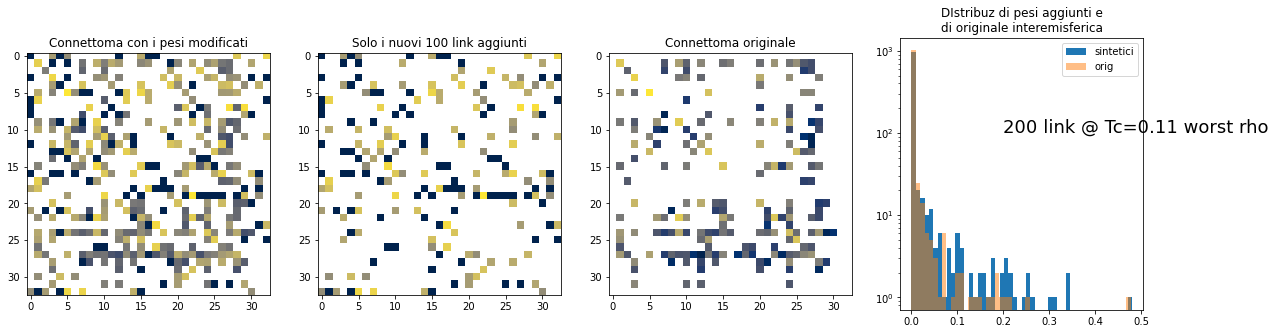

In [19]:
t_c_analizzata=0.11
n_link_aggiunti=200
res1,_=find_min_max(t_c=t_c_analizzata, n_link=n_link_aggiunti)

best_conn_max_rho=o_w[o_a_index[n_link_aggiunti]][res1['best']['chi']]

only_added_links=copy.deepcopy(best_conn_max_rho)
for i in range(66):
    for j in range(66):
        if W66[i,j]!=0:
            only_added_links[i,j]=0

fig,ax=plt.subplots(ncols=4, figsize=(20,5))
ax[0].imshow(best_conn_max_rho[0:33,33:],norm=colors.LogNorm(), cmap='cividis')
ax[0].set_title('Connettoma con i pesi modificati')
#plt.show()

ax[1].imshow(only_added_links[0:33,33:],norm=colors.LogNorm(), cmap='cividis')
ax[1].set_title('Solo i nuovi 100 link aggiunti')
#plt.show()

ax[2].imshow(W66[0:33,33:],norm=colors.LogNorm(), cmap='cividis')
ax[2].set_title('Connettoma originale')
#plt.show()

ax[3].hist(only_added_links[0:33,33:].flatten(), bins=50, log=True,label='sintetici')
ax[3].hist(W66[0:33,33:].flatten(), bins=50, log=True, alpha=0.5,label='orig')
ax[3].legend()
ax[3].text(0.2,100, str(n_link_aggiunti)+' link @ Tc='+str(t_c_analizzata)+' worst rho', fontsize=18)
ax[3].set_title('DIstribuz di pesi aggiunti e\ndi originale interemisferica')
plt.show()

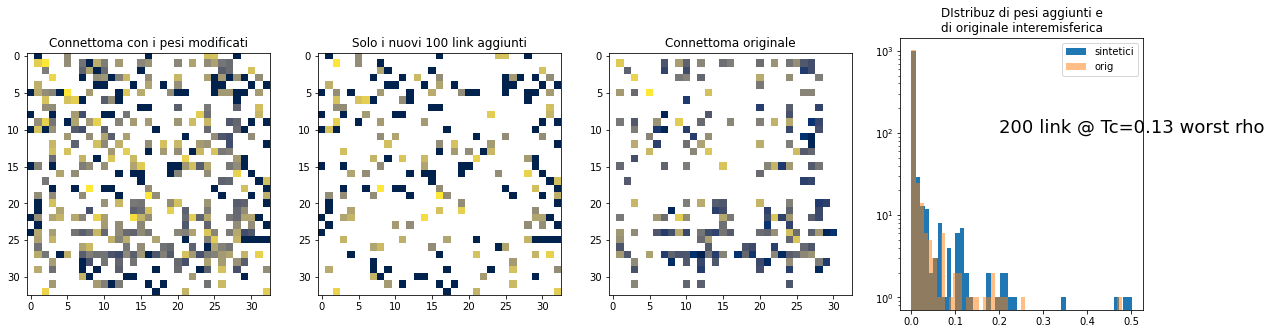

In [20]:
t_c_analizzata=0.13
n_link_aggiunti=200
res1,_=find_min_max(t_c=t_c_analizzata, n_link=n_link_aggiunti)

best_conn_max_rho=o_w[o_a_index[n_link_aggiunti]][res1['best']['rho']]

only_added_links=copy.deepcopy(best_conn_max_rho)
for i in range(66):
    for j in range(66):
        if W66[i,j]!=0:
            only_added_links[i,j]=0

fig,ax=plt.subplots(ncols=4, figsize=(20,5))
ax[0].imshow(best_conn_max_rho[0:33,33:],norm=colors.LogNorm(), cmap='cividis')
ax[0].set_title('Connettoma con i pesi modificati')
#plt.show()

ax[1].imshow(only_added_links[0:33,33:],norm=colors.LogNorm(), cmap='cividis')
ax[1].set_title('Solo i nuovi 100 link aggiunti')
#plt.show()

ax[2].imshow(W66[0:33,33:],norm=colors.LogNorm(), cmap='cividis')
ax[2].set_title('Connettoma originale')
#plt.show()

ax[3].hist(only_added_links[0:33,33:].flatten(), bins=50, log=True,label='sintetici')
ax[3].hist(W66[0:33,33:].flatten(), bins=50, log=True, alpha=0.5,label='orig')
ax[3].legend()
ax[3].text(0.2,100, str(n_link_aggiunti)+' link @ Tc='+str(t_c_analizzata)+' worst rho', fontsize=18)
ax[3].set_title('DIstribuz di pesi aggiunti e\ndi originale interemisferica')
plt.show()

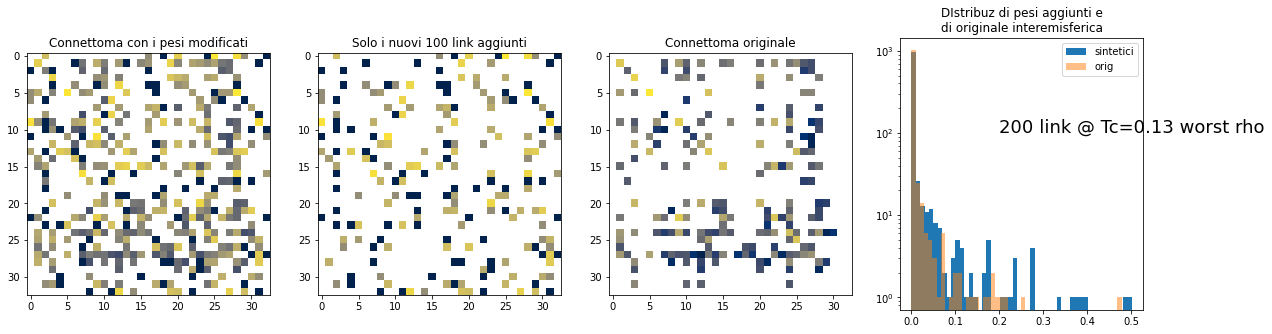

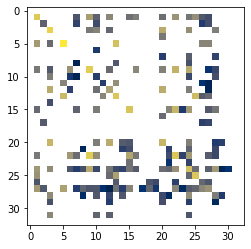

In [21]:
t_c_analizzata=0.13
n_link_aggiunti=200
res1,_=find_min_max(t_c=t_c_analizzata, n_link=n_link_aggiunti)

best_conn_max_rho=o_w[o_a_index[n_link_aggiunti]][res1['worst']['rho']]

only_added_links=copy.deepcopy(best_conn_max_rho)
for i in range(66):
    for j in range(66):
        if W66[i,j]!=0:
            only_added_links[i,j]=0

fig,ax=plt.subplots(ncols=4, figsize=(20,5))
ax[0].imshow(best_conn_max_rho[0:33,33:],norm=colors.LogNorm(), cmap='cividis')
ax[0].set_title('Connettoma con i pesi modificati')
#plt.show()

ax[1].imshow(only_added_links[0:33,33:],norm=colors.LogNorm(), cmap='cividis')
ax[1].set_title('Solo i nuovi 100 link aggiunti')
#plt.show()

ax[2].imshow(W66[0:33,33:],norm=colors.LogNorm(), cmap='cividis')
ax[2].set_title('Connettoma originale')
#plt.show()

ax[3].hist(only_added_links[0:33,33:].flatten(), bins=50, log=True,label='sintetici')
ax[3].hist(W66[0:33,33:].flatten(), bins=50, log=True, alpha=0.5,label='orig')
ax[3].legend()
ax[3].text(0.2,100, str(n_link_aggiunti)+' link @ Tc='+str(t_c_analizzata)+' worst rho', fontsize=18)
ax[3].set_title('DIstribuz di pesi aggiunti e\ndi originale interemisferica')
plt.show()


plt.imshow(W66[0:33,33:],norm=colors.LogNorm(), cmap='cividis')
#plt.title('Connettoma originale')
plt.show()

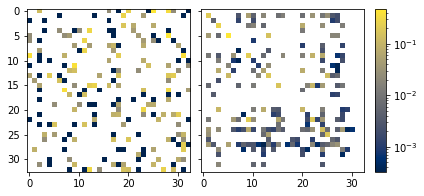

In [134]:
t_c_analizzata=0.13
n_link_aggiunti=200
res1,_=find_min_max(t_c=t_c_analizzata, n_link=n_link_aggiunti)

best_conn_max_rho=o_w[o_a_index[n_link_aggiunti]][res1['worst']['rho']]

only_added_links=copy.deepcopy(best_conn_max_rho)
for i in range(66):
    for j in range(66):
        if W66[i,j]!=0:
            only_added_links[i,j]=0


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

# Set up figure and image grid
fig = plt.figure(figsize=(9.75, 3))

ax1,ax2 = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,2),
                 axes_pad=0.15,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.15,
                 )

# Add data to image grid
ax1.imshow(only_added_links[0:33,33:],norm=colors.LogNorm(), cmap='cividis')
im=ax2.imshow(W66[0:33,33:],norm=colors.LogNorm(), cmap='cividis')


# Colorbar
ax2.cax.colorbar(im, cmap='cividis')
ax2.cax.toggle_label(True)

#plt.tight_layout()    # Works, but may still require rect paramater to keep colorbar labels visible
plt.savefig('../Figure/Risultati/connettoma_interemisferica_0.13_200_worst_rho.pdf',bbox_inches='tight')
plt.show()

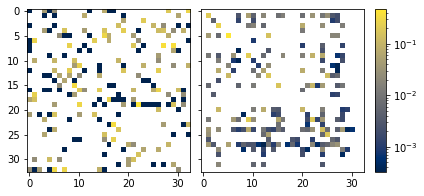

In [135]:
t_c_analizzata=0.11
n_link_aggiunti=200
res1,_=find_min_max(t_c=t_c_analizzata, n_link=n_link_aggiunti)

best_conn_max_rho=o_w[o_a_index[n_link_aggiunti]][res1['best']['chi']]

only_added_links=copy.deepcopy(best_conn_max_rho)
for i in range(66):
    for j in range(66):
        if W66[i,j]!=0:
            only_added_links[i,j]=0


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

# Set up figure and image grid
fig = plt.figure(figsize=(9.75, 3))

ax1,ax2 = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,2),
                 axes_pad=0.15,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.15,
                 )

# Add data to image grid
ax1.imshow(only_added_links[0:33,33:],norm=colors.LogNorm(), cmap='cividis')
im=ax2.imshow(W66[0:33,33:],norm=colors.LogNorm(), cmap='cividis')


# Colorbar
ax2.cax.colorbar(im, cmap='cividis')
ax2.cax.toggle_label(True)

#plt.tight_layout()    # Works, but may still require rect paramater to keep colorbar labels visible
plt.savefig('../Figure/Risultati/connettoma_interemisferica_0.11_200_best_chi.pdf',bbox_inches='tight')
plt.show()

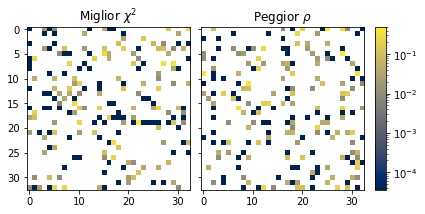

In [138]:
t_c_analizzata=0.11
n_link_aggiunti=200
res1,_=find_min_max(t_c=t_c_analizzata, n_link=n_link_aggiunti)

best_conn_max_rho=o_w[o_a_index[n_link_aggiunti]][res1['best']['chi']]

only_added_links=copy.deepcopy(best_conn_max_rho)
for i in range(66):
    for j in range(66):
        if W66[i,j]!=0:
            only_added_links[i,j]=0


            
            
t_c_analizzata=0.13
n_link_aggiunti=200
res1,_=find_min_max(t_c=t_c_analizzata, n_link=n_link_aggiunti)

best_conn_max_rho=o_w[o_a_index[n_link_aggiunti]][res1['worst']['rho']]

only_added_links_=copy.deepcopy(best_conn_max_rho)
for i in range(66):
    for j in range(66):
        if W66[i,j]!=0:
            only_added_links_[i,j]=0

            
            
            
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

# Set up figure and image grid
fig = plt.figure(figsize=(9.75, 3))

ax1,ax2 = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,2),
                 axes_pad=0.15,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.15,
                 )

# Add data to image grid
ax1.imshow(only_added_links[0:33,33:],norm=colors.LogNorm(), cmap='cividis')
ax1.set_title(r'Miglior $\chi^2$')
im=ax2.imshow(only_added_links_[0:33,33:],norm=colors.LogNorm(), cmap='cividis')

#im=ax3.imshow(W66[0:33,33:],norm=colors.LogNorm(), cmap='cividis')


# Colorbar
ax2.cax.colorbar(im, cmap='cividis')
ax2.cax.toggle_label(True)
ax2.set_title(r'Peggior $\rho$')
#plt.tight_layout()    # Works, but may still require rect paramater to keep colorbar labels visible
plt.savefig('../FigurePowerPoint/connettoma_best_chi_worst_rho.svg',bbox_inches='tight')
plt.show()